# 2. COMPAS dataset (Scarlett+Lily)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
id                         7214 non-null int64
name                       7214 non-null object
first                      7214 non-null object
last                       7214 non-null object
compas_screening_date      7214 non-null object
sex                        7214 non-null object
dob                        7214 non-null object
age                        7214 non-null int64
age_cat                    7214 non-null object
race                       7214 non-null object
juv_fel_count              7214 non-null int64
decile_score               7214 non-null int64
juv_misd_count             7214 non-null int64
juv_other_count            7214 non-null int64
priors_count               7214 non-null int64
days_b_screening_arrest    6907 non-null float64
c_jail_in                  6907 non-null object
c_jail_out                 6907 non-null object
c_case_number              7192 non

* `Age`: The defendent's age in years
* `c_charge_degree`: The type of crime a defendent has been charged with, either M (misdemeanor, less serious), or F(felony, more serious)
* `race`: Defendent's race (categorical)
* `sex`: Defendent's biological sex (M/F)
* `length_of_stay`: How long between when a defendant was charged and when they were released 
* `priors_count`: Count for number of prior times a defendant has been charged
* `juv_fel_count`: Count for number of times a defendant was charged with a felony as a juvenile
* `juv_misd_count`: Count for number of times a defendant was charged with a misdemeanor as a juvenile
* `juv_other_count`: Count for number of times a defendant was charged with something else as a juvenile
* `c_charge_desc`: Specific text field with type of charge.

Variables that are pre-processed data include:

* `length_of_stay_thresh`: A thresholded version of `length_of_stay` variable, preprocessed such that values above 30 have been capped at 30
* `priors_1`: Indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count`=1, 0 otherwise
* `priors_234`: Indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count` is 2, 3, 4; 0 otherwise
* `priors_5plus`: Another indicator variable derived from `priors_count`, preprocessed such that 1 if `priors_count`=5 or more, 0 otherwise
* `juv_fel_1plus`: Indicator variable derived from `juv_fel_count`, 1 if `juv_fel_count`, is 1 or more; 0 otherwise
* `juv_misd_1plus`: Indicator variable derived from `juv_misd_count`, 1 if `juv_misd_count`, is 1 or more; 0 otherwise
* `juv_other_1plus`: Indicator variable derived from `juv_other_count`, 1 if `juv_other_count`, is 1 or more; 0 otherwise
* `charge_any_drug`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was drug-related
* `charge_any_violence_aggression`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was violence or aggression related
* `charge_any_theft`: Indicator variable derived from `c_charge_desc`, indicating our best guess as to whether the crime charged was theft or burglary related

The target outcome variable is `two_year_recid`, which indicates whether or not a defendent recidivated within two years.

The variable `decile_score` is a 1-10 COMPAS score based on decile, and the variable `score_text` is a Low/Medium/High score category from COMPAS. Both of these variables should not be used in building our model.

In [ ]:
print(df.shape)
print(list(df.columns))

(7214, 53)
['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']


In [ ]:
# age is a numeric variable while age_cat 
print(df["age"].unique())
print(df["age_cat"].unique())

[69 34 24 23 43 44 41 39 21 27 37 47 31 25 64 32 36 26 33 30 55 49 29 51
 35 28 48 63 53 38 22 62 56 45 40 50 20 71 66 54 19 59 42 52 61 46 58 78
 57 70 60 68 65 83 67 75 72 74 96 73 18 77 80 76 79]
['Greater than 45' '25 - 45' 'Less than 25']


In [ ]:
print(df["priors_count.1"].unique())
print(df["priors_count"].unique())

[ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]
[ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]


In [ ]:
print(df["type_of_assessment"].unique())

['Risk of Recidivism']


In [ ]:
print(df["score_text"].unique())

['Low' 'High' 'Medium']


## 2.1 Literature Review

Correctional Offender Management Profiling for Alternative Sanctions(COMPAS) dataset, gathered by ProPublica [Angwin et al., 2016], contains information about the recidivism
risk predicted by the COMPAS tool, as well as the ground truth recidivism rates, for 7214 defendants who were arrested in Broward County, Florida, in the year of 2013 and 2014. The input used for prediction of recidivism is wide-scale and includes 137 factors like age, gender, and criminal history of the defendant. As COMPAS tool is helpful in ways that it provides scores from 1 to 10, classify the risk of recidivism as low-risk (1 to 4), medium-risk (5 to 7), or high-risk (8 to 10), it has been used to assess more than 1 million offenders since 1998. 

However, the tool suffers from machine bias and leads to racial disparities in the predictions. Black defendants who did not recidivate were incorrectly predicted to reoffend (False Positive) at a rate of 44.9%, nearly twice as high as their white counterparts at 23.5%; and white defendants who did recidivate were incorrectly predicted to not reoffend (False Negative) at a rate of 47.7%, nearly twice as high as their black counterparts at 28.0%. []

The popular fariness metrics are [Rahman, 2020]

- True Positive Rate (TPR) also called recall or sensitivity
- True Negative Rate (TNR) also called specificity
- Positive Predictive Value (PPV) also called precision 
- False Negative Rate (FNR)
- False Positive Rate (FPR) also called fall out 

And the formular are the followings: <br>
TPR = $\frac{TP}{Actual Positive}  = \frac{TP}{TP + FN}$ <br>
TNR = $\frac{TP}{Actual Negative}  = \frac{TN}{TN + FP}$ <br>
PPV = $ \frac{TP}{TP + FP}$ <br>
FNR = $\frac{FN}{Actual Positive} = \frac{FN}{FN + TP}$ <br>
FPR = $\frac{FP}{Actual Negative} = \frac{FP}{FP + TN}$ <br>




## 2.2 Data Analysis 

According to Northpointe’s practitioners guide, COMPAS' scores in the medium and high range garner more interest from supervision agencies than low scores, as a low score would suggest there is little risk of general recidivism.” So when turning the problem into a binary classification problem, we assume any score 5 or higher (medium or high risk) means that a defendant is treated as a likely recividist (1), and a score of 4 or lower (low risk) means that a defendant is treated as unlikely to re-offend (0). 

In [ ]:
# turn into a binary classification problem
# create feature is_med_or_high_risk
df['medium_or_high_risk']  = (df['decile_score']>=5).astype(int)

The **“true”** recidivism value (whether or not the defendant committed another crime in the next two years) is in the two_year_recid column.

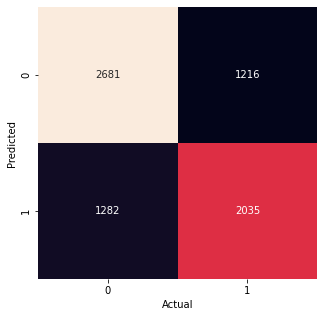

In [ ]:
cm = pd.crosstab(df['medium_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'])
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

In [ ]:
[[tn , fp],[fn , tp]]  = confusion_matrix(df['two_year_recid'], df['medium_or_high_risk'])
print("True negatives:  ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:  ", tp)

True negatives:   2681
False positives:  1282
False negatives:  1216
True positives:   2035


In [ ]:
print("True positive rate (overall): ", tp/(tp+fn))
print("False positive rate (overall): ", fp/(fp+tn))
print("True negative rate (overall): ", tn/(tn+fp))
print("False negative rate (overall): ", fn/(fn+tp))
print("Positive predictive value (overall): ", tp/(tp+fp))

True positive rate (overall):  0.6259612426945556
False positive rate (overall):  0.32349230381024474
True negative rate (overall):  0.6765076961897553
False negative rate (overall):  0.3740387573054445
Positive predictive value (overall):  0.6135061802833887


Text(0.5, 0, 'False Positive Rate')

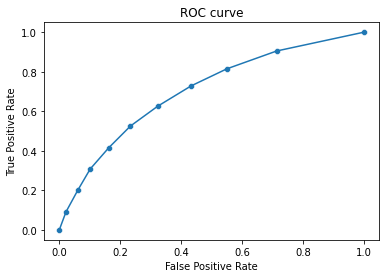

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, )
sns.lineplot(x=fpr, y=tpr)
plt.title("ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [ ]:
print("AUC:", roc_auc_score(df['two_year_recid'], df['decile_score']))

AUC: 0.7021662544019724


In [ ]:
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

We will focus primarily on African-American or Caucasian defendants, since they are the subject of the ProPublica claim.

In [ ]:
df_black = df[df['race']=="African-American"].copy()
df_black['medium_or_high_risk'] = (df_black['decile_score']>=5).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_black['two_year_recid'], df_black['medium_or_high_risk'])
print("False positive rate (Black)      : ", fp/(fp+tn))
print("False negative rate (Black)      : ", fn/(fn+tp))
print("True positive rate (overall): ", tp/(tp+fn))
print("True negative rate (Black): ", tn/(tn+fp))
print("Positive predictive value (Black): ", tp/(tp+fp))

False positive rate (Black)      :  0.44846796657381616
False negative rate (Black)      :  0.27985270910047344
True positive rate (overall):  0.7201472908995266
True negative rate (Black):  0.5515320334261838
Positive predictive value (Black):  0.6297148114075437


In [ ]:
df_white = df[df['race']=="Caucasian"].copy()
df_white['medium_or_high_risk'] = (df_white['decile_score']>=5).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_white['two_year_recid'], df_white['medium_or_high_risk'])
print("False positive rate (white)      : ", fp/(fp+tn))
print("False negative rate (white)      : ", fn/(fn+tp))
print("True positive rate (white): ", tp/(tp+fn))
print("True negative rate (white): ", tn/(tn+fp))
print("Positive predictive value (white): ", tp/(tp+fp))

False positive rate (white)      :  0.23454301075268819
False negative rate (white)      :  0.4772256728778468
True positive rate (white):  0.5227743271221532
True negative rate (white):  0.7654569892473119
Positive predictive value (white):  0.5913348946135831


This shows COMPAS scores appeared to favor white defendants over black defendants by underpredicting recidivism for white and overpredicting recidivism for black defendants.

|  | Overall | White | Black |
| ------ | ------- | ------ | ------ |
| FPR | 0.352 | 0.235 | 0.448|
| FNR | 0.346  | 0.477 | 0.280|
| TPR | 0.654 | 0.523 | 0.630|
| TNR | 0.648 | 0.765 | 0.552|
| PPV | 0.619 | 0.591 | 0.630|

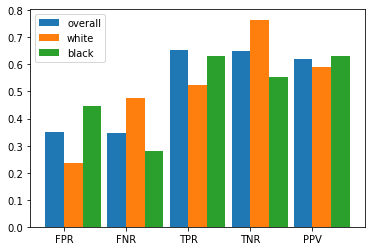

In [ ]:
metrics = ["FPR","FNR","TPR","TNR","PPV"]
overall = [0.352,0.346,0.654,0.648,0.619]
white = [0.235,0.477,0.523,0.765,0.591]
black = [0.448,0.280,0.630,0.552,0.630]

bar_width = 0.3
index_overall = np.arange(len(metrics))
index_white = index_overall + bar_width
index_black = index_white + bar_width

plt.bar(index_overall,height=overall,width=bar_width,label="overall")
plt.bar(index_white,height=white,width=bar_width,label="white")
plt.bar(index_black,height=black,width=bar_width,label="black")
plt.xticks(index_overall+bar_width/2,metrics)
plt.legend()

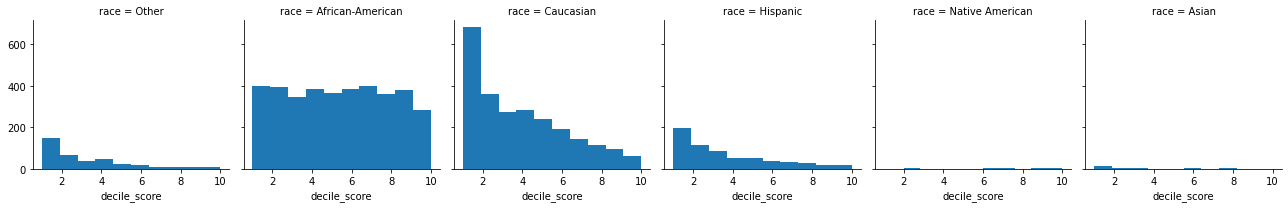

In [ ]:
# frequency plot
g = sns.FacetGrid(df, col="race", margin_titles=True);
g.map(plt.hist, "decile_score", bins=10);

## 2.3 Binary Classification Pipeline - Logistics Regression

In [ ]:
def process_COMPAS(temp_df):
    """
    Pick columns-"age","priors_count","race","two_year_recid","sex",
    'juv_fel_count', 'juv_misd_count', 'juv_other_count', 
    'age_cat', 'c_charge_degree', 'c_charge_desc', 'length_of_stay' 
    from the dataframe. Scale the numeric values and split the dataframe 
    into training data (X,Y) and testing data (X,Y)
    
    Input: COMPAS data in dataframe
    Output: 
           * x_train
           * x_test
           * y_train
           * y_test
    """
    # deepcopy
    df = temp_df.copy()
    cols = ["age","priors_count","two_year_recid","sex",
              'juv_fel_count', 'juv_misd_count', 'juv_other_count', 
              'age_cat', 'c_charge_degree', 'c_charge_desc', 'length_of_stay']
    # remove invalid/null entries
    df = df[(df['days_b_screening_arrest'] <= 30)
                & (df['days_b_screening_arrest'] >= -30)
                & (df['is_recid'] != -1)
                & (df['c_charge_degree'] != 'O')
                & (df['score_text'] != 'N/A')]
    # calculate length_of_stay
    df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
    df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
    df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).astype(int)
    df = df.drop_duplicates()
    df = df[cols]
    
    # scale
    scaler = MinMaxScaler()
    numerical_features = ["age", "priors_count",'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'length_of_stay']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    categorical_features = ["age_cat","sex", 'c_charge_degree', 'c_charge_desc']
    df = pd.get_dummies(data=df, columns=categorical_features)

    # split data into training and testing
    x, y = df.drop("two_year_recid", axis=1), df["two_year_recid"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = process_COMPAS(df)

(4320, 402)
(1852, 402)
(4320,)
(1852,)


In [ ]:
def logisticRegression(x_train, y_train, x_test):
    from sklearn.linear_model import LogisticRegression

    logisticRegr = LogisticRegression(solver='lbfgs', max_iter=500)
    logisticRegr.fit(x_train, y_train)

    predictions = logisticRegr.predict(x_test)
    return predictions

In [ ]:
# predictions of testing data
predictions = logisticRegression(x_train, y_train, x_test)
predictions.shape

(1852,)

In [ ]:
def predictionSummary(x, y_real, y_predict):
    [[tn , fp],[fn , tp]]  = confusion_matrix(y_real, y_predict)
    overall = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (overall): ", tp/(tp+fn))
    print("False positive rate (overall): ", fp/(fp+tn))
    print("True negative rate (overall): ", tn/(tn+fp))
    print("False negative rate (overall): ", fn/(fn+tp))
    print("Positive predictive value (overall): ", tp/(tp+fp),"\n")

    x['medium_or_high_risk'] = y_predict
    x['two_year_recid'] = y_real
    x_black = x[df['race']=='African-American'].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_black['two_year_recid'], x_black['medium_or_high_risk'])
    black = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (balck): ", tp/(tp+fn))
    print("False positive rate (balck): ", fp/(fp+tn))
    print("True negative rate (balck): ", tn/(tn+fp))
    print("False negative rate (balck): ", fn/(fn+tp))
    print("Positive predictive value (balck): ", tp/(tp+fp),"\n")

    x_white = x[df['race']=='Caucasian'].copy()
    [[tn , fp],[fn , tp]]  = confusion_matrix(x_white['two_year_recid'], x_white['medium_or_high_risk'])
    white = [fp/(fp+tn),fn/(fn+tp),tp/(tp+fn),tn/(tn+fp),tp/(tp+fp)]
    print("True positive rate (white): ", tp/(tp+fn))
    print("False positive rate (white): ", fp/(fp+tn))
    print("True negative rate (white): ", tn/(tn+fp))
    print("False negative rate (white): ", fn/(fn+tp))
    print("Positive predictive value (white): ", tp/(tp+fp),"\n")

    metrics = ["FPR","FNR","TPR","TNR","PPV"]
    bar_width = 0.3
    index_overall = np.arange(len(metrics))
    index_white = index_overall + bar_width
    index_black = index_white + bar_width

    plt.bar(index_overall,height=overall,width=bar_width,label="overall")
    plt.bar(index_white,height=white,width=bar_width,label="white")
    plt.bar(index_black,height=black,width=bar_width,label="black")
    plt.xticks(index_overall+bar_width/2,metrics)
    plt.legend()

    return

In [ ]:
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

True positive rate (overall):  0.5622775800711743
False positive rate (overall):  0.2358771060455897
True negative rate (overall):  0.7641228939544104
False negative rate (overall):  0.4377224199288256
Positive predictive value (overall):  0.6657303370786517 

True positive rate (balck):  0.632
False positive rate (balck):  0.26973684210526316
True negative rate (balck):  0.7302631578947368
False negative rate (balck):  0.368
Positive predictive value (balck):  0.7198177676537585 

True positive rate (white):  0.46586345381526106
False positive rate (white):  0.20052770448548812
True negative rate (white):  0.7994722955145118
False negative rate (white):  0.5341365461847389
Positive predictive value (white):  0.6041666666666666 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launch

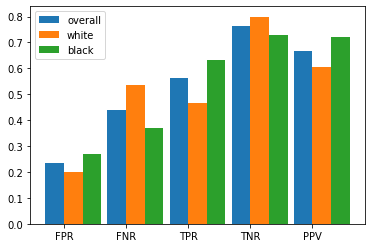

In [ ]:
predictionSummary(x_test, y_test, predictions)

True positive rate (overall):  0.6032553407934893
False positive rate (overall):  0.20858113848768053
True negative rate (overall):  0.7914188615123194
False negative rate (overall):  0.3967446592065107
Positive predictive value (overall):  0.7072152653548003 

True positive rate (balck):  0.6950904392764858
False positive rate (balck):  0.28638941398865786
True negative rate (balck):  0.7136105860113422
False negative rate (balck):  0.3049095607235142
Positive predictive value (balck):  0.727027027027027 

True positive rate (white):  0.4537521815008726
False positive rate (white):  0.15188470066518847
True negative rate (white):  0.8481152993348116
False negative rate (white):  0.5462478184991274
Positive predictive value (white):  0.654911838790932 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-p

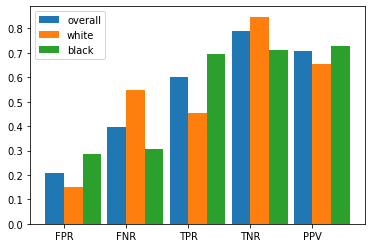

In [ ]:
# predictions of training data
predictions = logisticRegression(x_train, y_train, x_train)
predictionSummary(x_train, y_train, predictions)

## 2.4 Binary Classification Pipeline - Decision Tree

In [ ]:
def decisionTree(x_train, y_train, x_test):
    from sklearn import tree
    clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
    clf = clf.fit(x_train, y_train)

    predictions = clf.predict(x_test)
    return predictions

In [ ]:
def process_COMPAS_small(temp_df):
    """
    Pick less columnds of df to reduce the dimention of tree
    """
    # deepcopy
    df = temp_df.copy()
    cols = ["age","priors_count","two_year_recid","sex",
              'juv_fel_count', 'length_of_stay']
    # remove invalid/null entries
    df = df[(df['days_b_screening_arrest'] <= 30)
                & (df['days_b_screening_arrest'] >= -30)
                & (df['is_recid'] != -1)
                & (df['c_charge_degree'] != 'O')
                & (df['score_text'] != 'N/A')]
    # calculate length_of_stay
    df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
    df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
    df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).astype(int)
    df = df.drop_duplicates()
    df = df[cols]
    
    # scale
    scaler = MinMaxScaler()
    numerical_features = ["age", "priors_count",'juv_fel_count', 'length_of_stay']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    categorical_features = ["sex"]
    df = pd.get_dummies(data=df, columns=categorical_features)

    # split data into training and testing
    x, y = df.drop("two_year_recid", axis=1), df["two_year_recid"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    return x_train, x_test, y_train, y_test

(4320, 6)
(1852, 6)
(4320,)
(1852,)
True positive rate (overall):  0.5871886120996441
False positive rate (overall):  0.2547076313181368
True negative rate (overall):  0.7452923686818632
False negative rate (overall):  0.4128113879003559
Positive predictive value (overall):  0.6582446808510638 

True positive rate (balck):  0.632
False positive rate (balck):  0.34210526315789475
True negative rate (balck):  0.6578947368421053
False negative rate (balck):  0.368
Positive predictive value (balck):  0.6694915254237288 

True positive rate (white):  0.5180722891566265
False positive rate (white):  0.18997361477572558
True negative rate (white):  0.8100263852242744
False negative rate (white):  0.4819277108433735
Positive predictive value (white):  0.6417910447761194 

/root/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value 

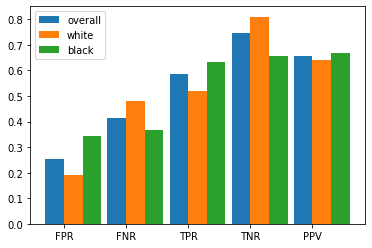

In [ ]:
# predictions of testing data
x_train, x_test, y_train, y_test = process_COMPAS_small(df)
predictions = decisionTree(x_train, y_train, x_test)
predictionSummary(x_test, y_test, predictions)

(4320, 6)
(1852, 6)
(4320,)
(1852,)
True positive rate (overall):  0.667853509664293
False positive rate (overall):  0.18394222599830076
True negative rate (overall):  0.8160577740016992
False negative rate (overall):  0.33214649033570703
Positive predictive value (overall):  0.7520045819014891 

True positive rate (balck):  0.7571059431524548
False positive rate (balck):  0.2504725897920605
True negative rate (balck):  0.7495274102079396
False negative rate (balck):  0.24289405684754523
Positive predictive value (balck):  0.7683566433566433 

True positive rate (white):  0.5165794066317626
False positive rate (white):  0.12527716186252771
True negative rate (white):  0.8747228381374723
False negative rate (white):  0.48342059336823734
Positive predictive value (white):  0.7237163814180929 

/root/venv/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warni

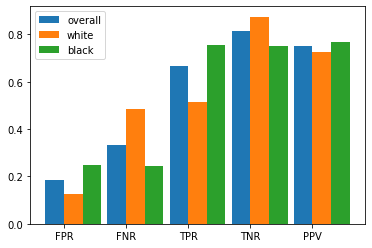

In [ ]:
x_train, x_test, y_train, y_test = process_COMPAS_small(df)
predictions = decisionTree(x_train, y_train, x_train)
predictionSummary(x_train, y_train, predictions)

## 2.5 Hypothesis Test Pipeline 

In [ ]:
# Assumptions

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample are normally distributed.
# Observations in each sample have the same variance.
# Interpretation
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

from scipy.stats import ttest_ind
def hypothesisTest(df):
	df_black = df[df['race']=="African-American"].copy()
	black_two_year_reci = df_black['two_year_recid']


	df_white = df[df['race']=="Caucasian"].copy()
	white_two_year_reci = df_white['two_year_recid']
	white_is_reci = df_white['is_recid']
	black_is_reci = df_black['is_recid']

	# H0: null hypothesis: the mean of the African American two year recidivism rate = the mean of the Caucasian two year  recidivism rate
	# H1: alternate hypothesis: the mean of the African American two year recidivism rate > the mean of the Caucasian two year  recidivism rate
	stat, p = ttest_ind(black_two_year_reci, white_two_year_reci)
	print('first:')
	print('stat=%.3f, p=%.27f' % (stat, p))

	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	
	# so the result shows us the the mean rate are not the same 
	# Tests whether the means of two independent samples are significantly different.


	# H0: null hypothesis: the mean of the Caucasian recidivism rate = the mean of the Caucasian two year recidivism rate
	# H1: alternate hypothesis:  the mean of the Caucasian recidivism rate >= the mean of the Caucasian two year recidivism rate
	stat, p = ttest_ind(white_is_reci, white_two_year_reci)
	print('second:')
	print('stat=%.3f, p=%.27f' % (stat, p))
	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	# so the result shows us the the mean rate are the same 

	# H0: null hypothesis: the mean of the black African American rate = the mean of the African American two year recidivism rate
	# H1: alternate hypothesis:  the mean of the African American recidivism rate >= the mean of the African American two year recidivism rate
	stat, p = ttest_ind(black_is_reci, black_two_year_reci)
	print('third:')
	print('stat=%.3f, p=%.27f' % (stat, p))
	if p > 0.05:
		print('we are accepting null hypothesis, Probably the same distribution')
	else:
		print('we are rejecting null hypothesis, Probably different distributions')
	# so the result shows us the the mean rate are not the same 


In [ ]:
hypothesisTest(df)

first:
stat=9.356, p=0.000000000000000000011363682
we are rejecting null hypothesis, Probably different distributions
second:
stat=1.715, p=0.086351904428614872921698975
we are accepting null hypothesis, Probably the same distribution
third:
stat=3.149, p=0.001646144193052092100093553
we are rejecting null hypothesis, Probably different distributions


In [ ]:
# from scipy.stats import chi2_contingency
# table = [[10, 20, 30],[6,  9,  17]]
# stat, p, dof, expected = chi2_contingency(table)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

## 2.6 References

[1] Julia Angwin, Jeff Larson, Surya Mattu, and Lauren Kirchner. Machine Bias: There’s Software Used Across
the Country to Predict Future Criminals. And it’s Biased Against Blacks. https://www.propublica.org/
article/machine-bias-risk-assessments-in-criminal-sentencing, 2016.

[2] Rahman, F. (2020, September 8). Compas case study: Fairness of a Machine Learning Model. Medium. Retrieved September 28, 2021, from https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751. 

[3] The accuracy, fairness, and limits of ... - science advances. (n.d.). Retrieved September 28, 2021, from https://www.advances.sciencemag.org/content/4/1/eaao5580.full.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa928c63-0856-4021-a156-02d09e35182a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>